# ExtraaLearn Project
### **By Fani Tzina**

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# To read and manipulate our data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Impute missing values
from sklearn.impute import SimpleImputer

# For model building
from sklearn.linear_model import LogisticRegression

# Build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# import our data from the "ExtraaLearn" excel file:
df = pd.read_csv("ExtraaLearn.csv")

# I prefer to use a copy of my original dataset:
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(4612, 15)

**Observation**:
Our dataset has 4612 inputs -or else called "observations"- and 15 columns.

In [ ]:
# Let's take a look on the first five (5) rows of our data:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Let's take a look on the last five (5) rows of our data:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# Let's take a better look on our data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observation**:
1. Our dataset has ten *(10) Object columns* and the rest -five (5)- of them are all numerical.
2. There are no missing values in all 15 columns.

In [ ]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

**Observation**:
There are no duplicated values in our data.

In [ ]:
# Let's check the percentage of missing values in our data:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

ID                       0.0
age                      0.0
current_occupation       0.0
first_interaction        0.0
profile_completed        0.0
website_visits           0.0
time_spent_on_website    0.0
page_views_per_visit     0.0
last_activity            0.0
print_media_type1        0.0
print_media_type2        0.0
digital_media            0.0
educational_channels     0.0
referral                 0.0
status                   0.0
dtype: float64

**Observation**: As stated above, we can tell that indeed, there are no missing values in our data.


In [ ]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observation**: Let's analyze the outcome of each ***numerical*** column from the line above:
1. **AGE**: The average age of customers is 46 years and it has a wide range from 18 to 63 years.
2. **WEBSITE_VISITS**: The mean number of website visits is approximately 3.57, but the standard deviation is quite high (2.83), which indicates a variability in the website engagement. Also, the number of website visits ranges from 0 to 30 visits.
3. **TIME_SPENT_ON_WEBSITE**: It is worth to mention that there is a huge difference between the third quartile and the maximum value. The range of time spent on the website is very wide from 148.75 to 2537, meaning that the outliers of our dataset are the customers that spent a great amount of time on the website.
4. **PAGE_VIEWS_PER_VISIT**: Average page-views for each customer is 3, and there is worth mentioned difference between the third quartile (3.75) and maximum value(18.4).
5. **STATUS**: This is the binary variable of our dataset, because one can see that its values range from 0 to 1. The average status is almost 0.3 and the standard deviation is almost equal to 0.46, which suggests some variability in the status variable.

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
# Let's print the % sub categories of each category, to get a better look of the Object columns:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ID are :
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
**************************************************
Unique values in current_occupation are :
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
**************************************************
Unique values in first_interaction are :
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
**************************************************
Unique values in profile_completed are :
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
**************************************************
Unique values in last_activity are :
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
**************************************************
Unique v

**Observation**: Let's analyze the outcome of each ***object*** column from the line above:
* All records are for existing customers.
* Most of the company's customers are professionals.
* Most customers had their first interaction with ExtraaLearn through its website.
* There is a slight difference between full-completed and medium-completed profiles.
* Most customers have seen an ad of ExtraaLearn in the newspaper or magazine or digital media in general. Magazine had a slightly higher influence to the crowd -in comparison to the other 2 means-.
* Most customers interact with the lead through emails.
* Only 15.3% (= 705 out of 4612) of customers have heard about ExtraaLearn in education channels like online forums, discussion threads, educational websites, etc.
* Almost 98% of total inputs of the dataset does not come from reference.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

##**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



###**Missing Values**

In [ ]:
# # Missing value treatment
# As we saw previously, we do not have any missing values in our dataset.
# So there is no need for us to perform any kind of "Missing value treatment".
# Let's check again if we have any Missing values:
data.isna().sum()

# or:
# data.info()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observation**:
As we saw previously and on the line above, we do not have any missing values in our dataset. One can check this by using the "data.isna().sum()" or "data.info()" command, from which we can see that each column of our dataset as 4612 input values, as much as the size of our dataset (4612x15). As a result, there is no need for us to perform any kind of "Missing value treatment".


###**Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions:

**1. Age:**

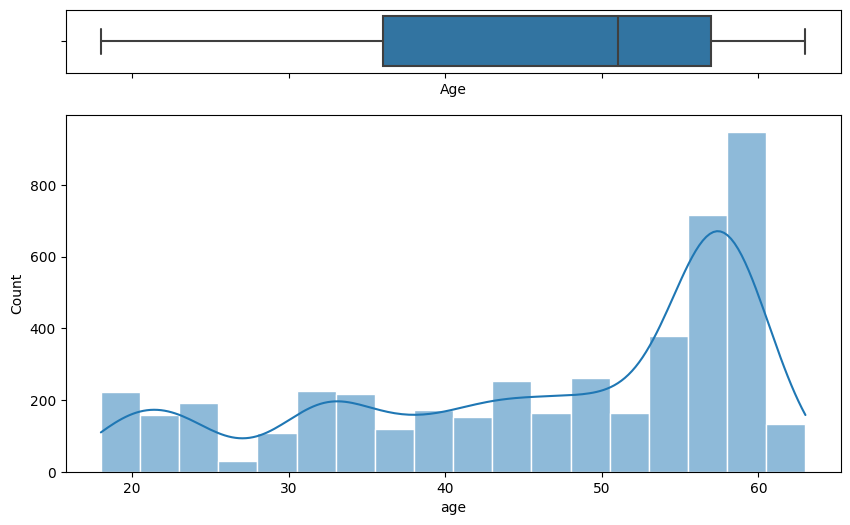

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add graph for each part
sns.boxplot(data=data, x="age", ax=ax_box)
sns.histplot(data=data, x="age", kde=True, ax=ax_hist)
ax_box.set(xlabel='Age')

plt.show()

**Observation**:
1. The distribution of "age" is skewed to the left.
2. From the boxplot, we can see that there are no outliers.

**2. website_visits**:

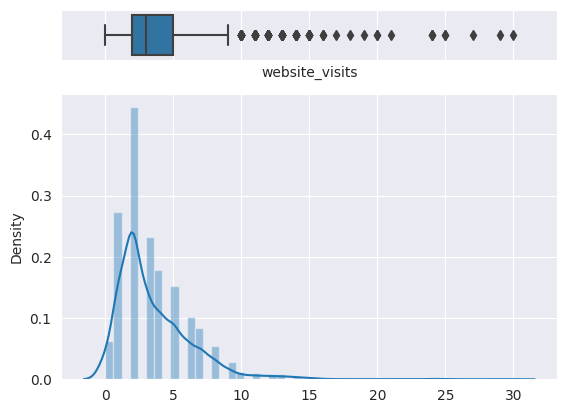

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x=data["website_visits"], ax=ax_box)
sns.distplot(x=data["website_visits"], ax=ax_hist)
ax_box.set(xlabel='website_visits')
plt.show()

**Observation**:
1. The distribution of "website_visits" is skewed to the left.
2. From the boxplot, we can see that there are outliers on the right side of the whiskers

**3. time_spent_on_website**:

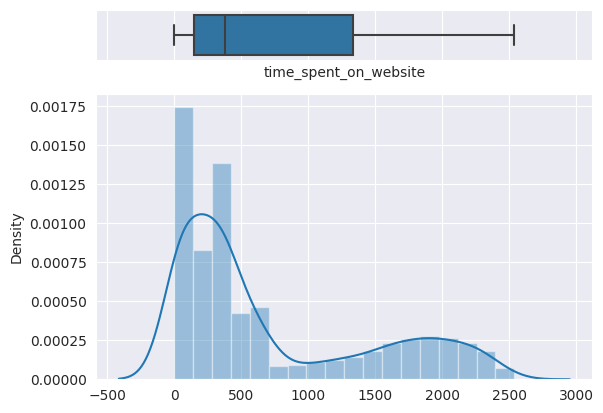

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data, x=data["time_spent_on_website"], ax=ax_box)
sns.distplot(x=data["time_spent_on_website"], ax=ax_hist)
ax_box.set(xlabel='time_spent_on_website')
plt.show()

**Observation**:
1. Most customers do not spend much time on the website and have 0 time-spent-on-website.
2. There are quite a few customers with a time-spent-on-website equal to ~400.

**4. page_views_per_visit**:

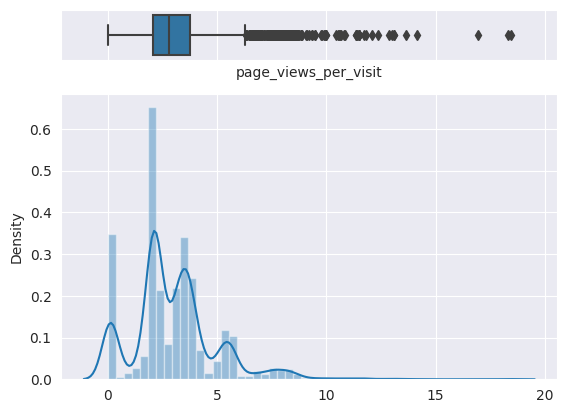

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x=data["page_views_per_visit"], ax=ax_box)
sns.distplot(x=data["page_views_per_visit"], ax=ax_hist)
ax_box.set(xlabel='page_views_per_visit')
plt.show()

**Observation**:
1. The distribution of "page_views_per_visit" is skewed to the right.
2. Data shows three peaks at "page_views_per_visit": the hightest of them is around ~2.8, while the other two are around the mean value of ~0.3 and ~4, respectully.
3. From the boxplot, we can see that there are customers, with more than ~6 average number of pages on the website viewed during the visits, who are being considered as outliers.

**5. status**:

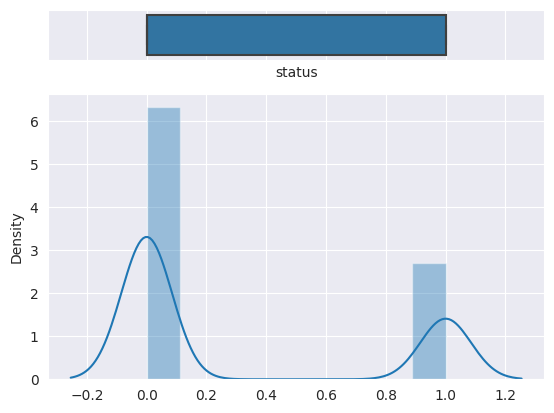

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=data, x=data["status"], ax=ax_box)
sns.distplot(x=data["status"], ax=ax_hist)
ax_box.set(xlabel='status')
plt.show()

**Observation:**
The distribution of "status" shows 2 normaly distributed peaks on 0 and 1 -which is expected due to the fact that status is a binary variable- and we can tell that the number of leads that were not converted to a paid customer is almost twice than the number of the leads who eventually were converted to paid customers.

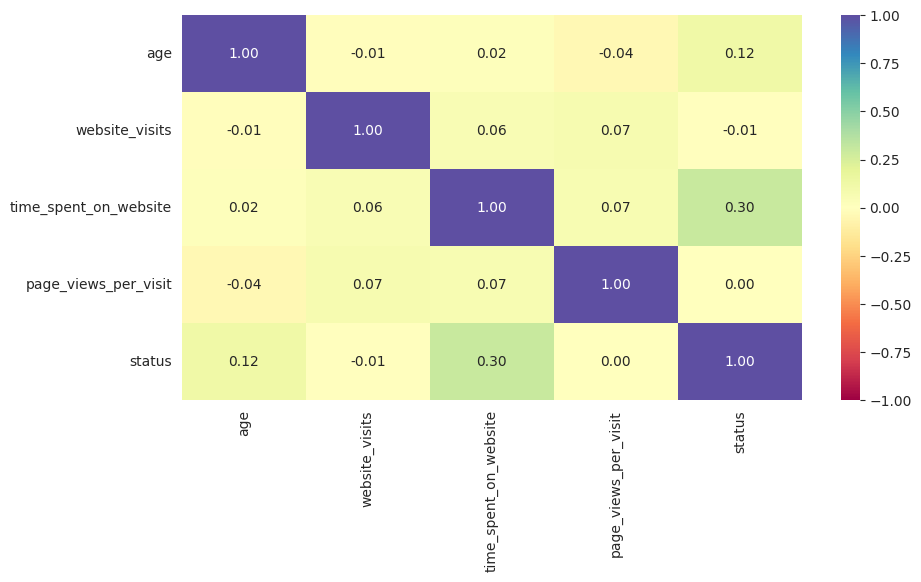

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**:
1. page_views_per_visit shows a bit of a positive  correlation with time_spent_on_website.
2. There's a slight positive correlation between age and page_views_per_visit.
3. There's a slight negative correlation of page_views_per_visit with age.

###Let's find the percentage of outliers, in each column of the data, using IQR

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

age                      0.000000
website_visits           3.339115
time_spent_on_website    0.000000
page_views_per_visit     5.572420
status                   0.000000
dtype: float64

**Observation**:
So we see that we have two (2) outliers in our dataset: website_visits and page_views_per_visit.
Now, we can decide whether to remove/treat them or not. Here, I choose to not treat them as there will be outliers in real case scenario and I want my model to learn the underlying pattern for such customers.

##Q1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

**I choose to split the data into 70% training set and 30% test set.**

In [ ]:
# Define the features and target variable
X = data[['current_occupation']]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

current_occupation    0
dtype: int64
------------------------------
current_occupation    0
dtype: int64
Professional    1815
Unemployed      1033
Student          380
Name: current_occupation, dtype: int64
******************************
Professional    1815
Unemployed      1033
Student          380
Name: current_occupation, dtype: int64
******************************
(3228, 2) (1384, 2)


**Observation**:
After encoding there are 2 columns.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Building the model**

We will be building **4 different models**:

* Logistic Regression
* Decision Tree
* Random Forest
* Logistic Regression Model

**Logistic Regression** is a supervised learning algorithm that is used for binary classification problems i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:
P(y)=1/(1 + exp(-x))

In [ ]:
# Create a logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2258
           1       0.00      0.00      0.00       970

    accuracy                           0.70      3228
   macro avg       0.35      0.50      0.41      3228
weighted avg       0.49      0.70      0.58      3228



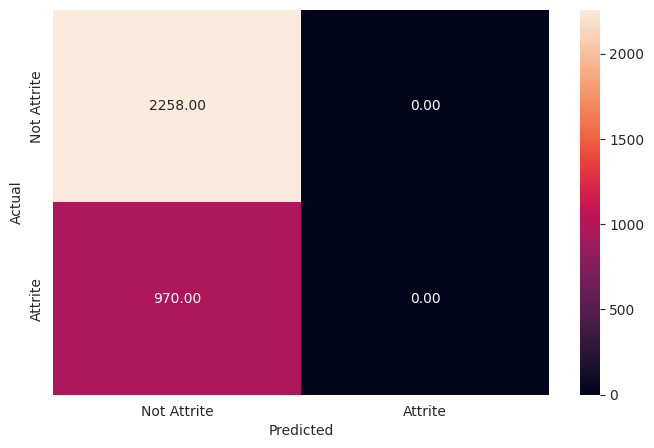

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the customers who are at risk of attrition.
Reading the confusion matrix (clockwise):

True Negative (Actual=0, Predicted=0): Model predicts that a customer would not attrite and the customer does not attrite

False Positive (Actual=0, Predicted=1): Model predicts that a customer would attrite but the customer does not attrite

False Negative (Actual=1, Predicted=0): Model predicts that a customer would not attrite but the customer attrites

True Positive (Actual=1, Predicted=1): Model predicts that a customer would attrite and the customer attrites

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       977
           1       0.00      0.00      0.00       407

    accuracy                           0.71      1384
   macro avg       0.35      0.50      0.41      1384
weighted avg       0.50      0.71      0.58      1384



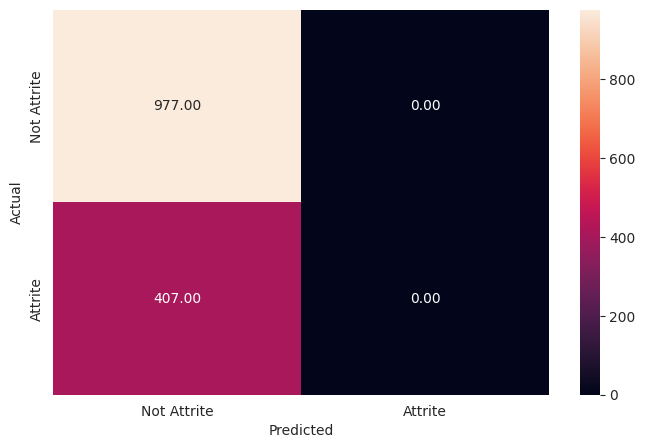

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

Observations:

We are getting an accuracy of almost 71% on train and test dataset.
However, the recall for this model is only equal to 1 for class 0 on train and test dataset.
As the recall has a stable/standard value, this model will perform well in finding out how current occupation affects lead status.
As we can see from the Confusion Matrix, this model has a great accuracy to identify correctly the positive (TP) inputs.

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

In [ ]:
# Building decision tree model
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2258
           1       0.00      0.00      0.00       970

    accuracy                           0.70      3228
   macro avg       0.35      0.50      0.41      3228
weighted avg       0.49      0.70      0.58      3228



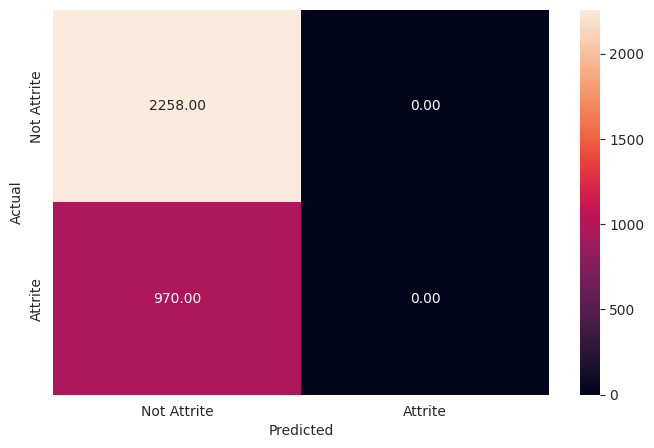

In [ ]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       977
           1       0.00      0.00      0.00       407

    accuracy                           0.71      1384
   macro avg       0.35      0.50      0.41      1384
weighted avg       0.50      0.71      0.58      1384



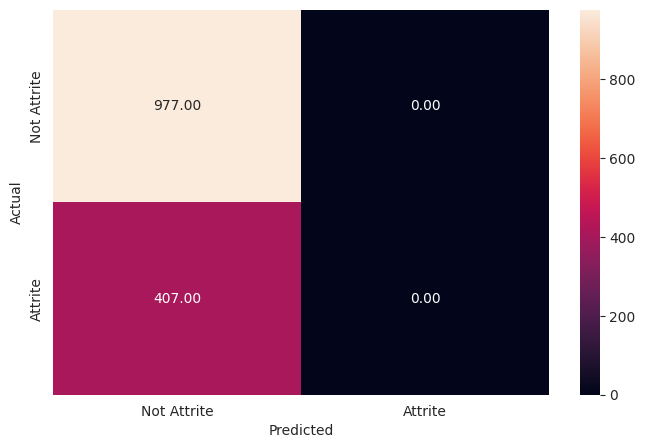

In [ ]:
#Let's check the performance on test data to see if the model is overfitting.
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation #**:
* The accuracy of our Decision Tree for the *training set* is equal to 70% and the recall for class 1 is always equal to 0.
* The accuracy of our Decision Tree for the *test set* is equal to 71% and the recall for class 1 is always equal to 0.

## Do we need to prune the tree?

Pruning a decision tree is a critical step in optimizing its performance and ensuring it generalizes well to new data. This procedure happens when our model does not perform well or/and there is overfitting, etc. In our case, we saw that the accuracy of our model was slightly better when using the test set than the accuracy of the training set. And, so, we do not have to prune our Decision Tree.

## Building a Random Forest model

In [ ]:
# Drop rows with missing values
data.drop(["ID"], axis=1, inplace=True)
data.drop(["current_occupation"], axis=1, inplace=True)
d = data.dropna()

X = data.drop('status', axis=1)
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

age                      0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------
age                      0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
Website       1766
Mobile App    1462
Name: first_interaction, dtype: int64
******************************
High      1593
Medium    1553
Low         82
Name: profile_completed, dtype: int64
******************************
Email Activity      1591
Phone Activity       860
Website Activity     777

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



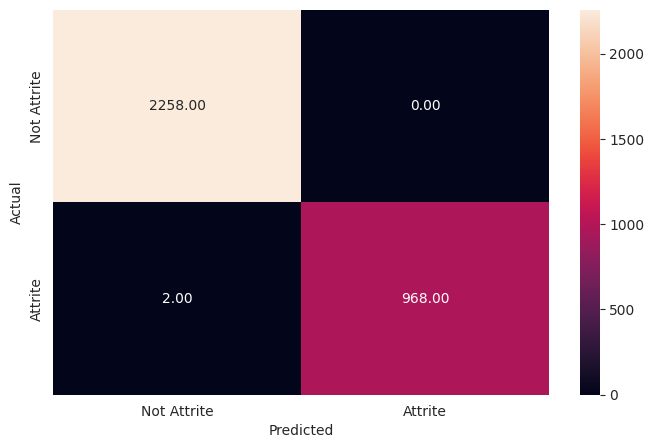

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rfc.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation**:
For all the metrics in the training dataset, the Random Forest gives a 100% score

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       977
           1       0.74      0.65      0.69       407

    accuracy                           0.83      1384
   macro avg       0.80      0.78      0.79      1384
weighted avg       0.83      0.83      0.83      1384



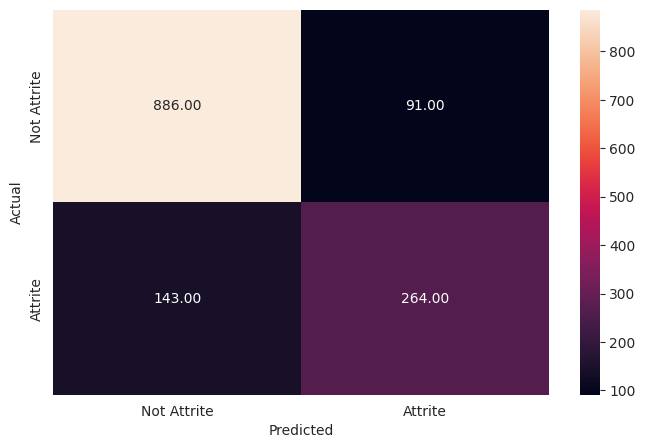

In [ ]:
# For the test set:
y_pred = rfc.predict(X_test)
metrics_score(y_test, y_pred)


**Observation**:
The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only
0.65 for class 1.
Precision is high for the test data as well, while the accuracy is equal to 83%.

<Axes: xlabel='Importance'>

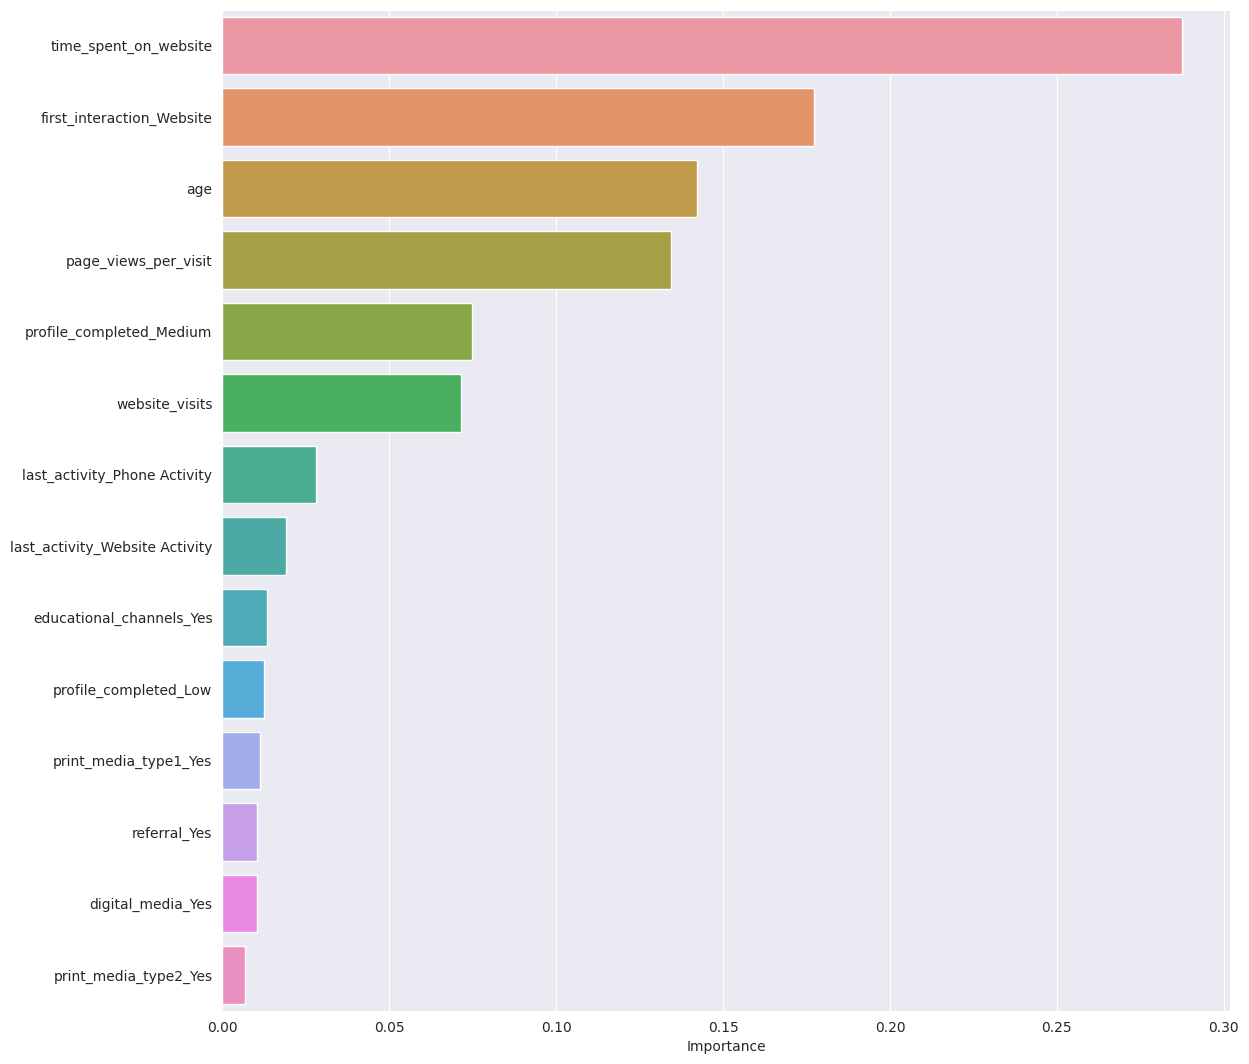

In [ ]:
#Let's check the feature importance of the Random Forest

importances = rfc.feature_importances_
columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

**Observation**:
The Random Forest further verifies the results from the decision tree that the most important features are "time_spent_on_website" "first_interaction".

## Do we need to prune the tree?

My Random Forest model is overfitting the training data, meaning it performs significantly better on the training set than on the test set, pruning the model is one way to address this issue. Pruning aims to reduce overfitting and improve the model's generalization performance. I suggest the 2 following methods in order to solve this problem:

1. Reduce the Number of Trees (n_estimators):
I could set this variable to a smaller value, such as 50, instead of the default 100 that I used above (see (a) in the following code box).
2. Limit the Depth of Trees (max_depth): (see (b) in the following code box)

In [ ]:
# (a)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



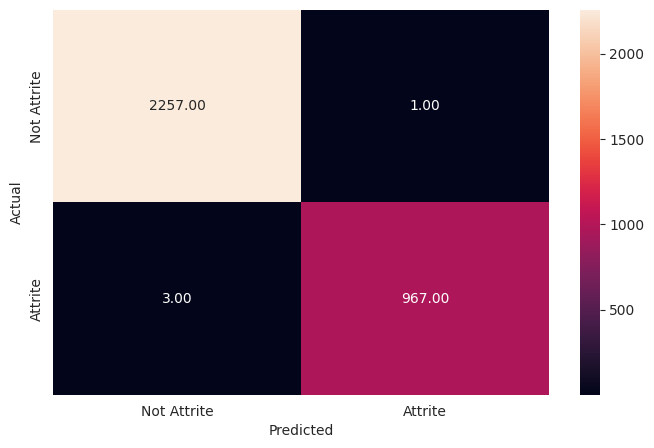

In [ ]:
# (a)
# Checking performance on the training data
y_pred_train_rf = rfc.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       977
           1       0.73      0.65      0.69       407

    accuracy                           0.83      1384
   macro avg       0.79      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



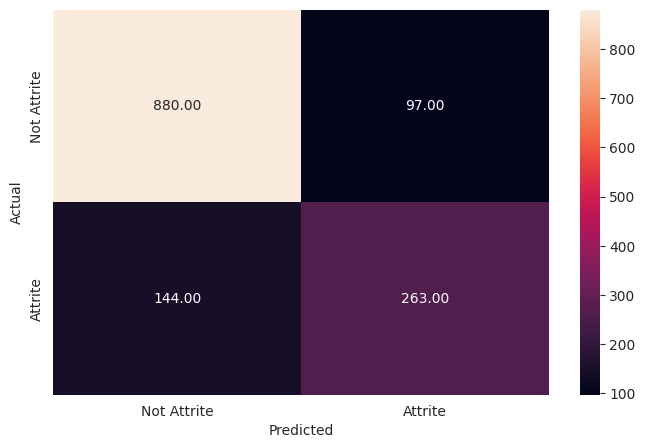

In [ ]:
# (a)
# For the test set:
y_pred = rfc.predict(X_test)
metrics_score(y_test, y_pred)

In [ ]:
#(b)
# Create a Random Forest Classifier with limited tree depth
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2258
           1       0.88      0.85      0.86       970

    accuracy                           0.92      3228
   macro avg       0.91      0.90      0.90      3228
weighted avg       0.92      0.92      0.92      3228



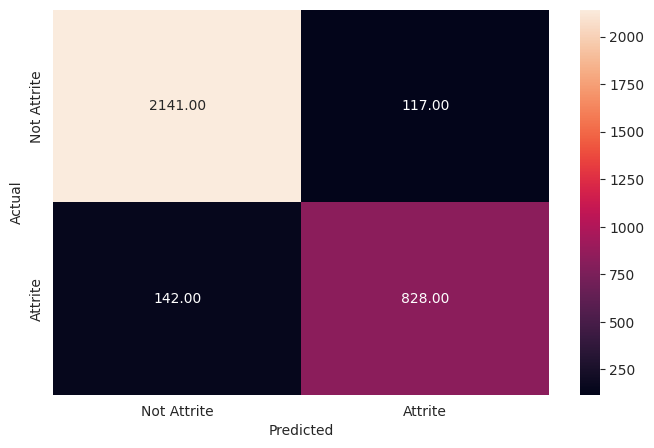

In [ ]:
# (b)
# Checking performance on the training data
y_pred_train_rf = rfc.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       977
           1       0.76      0.65      0.70       407

    accuracy                           0.84      1384
   macro avg       0.81      0.78      0.80      1384
weighted avg       0.83      0.84      0.83      1384



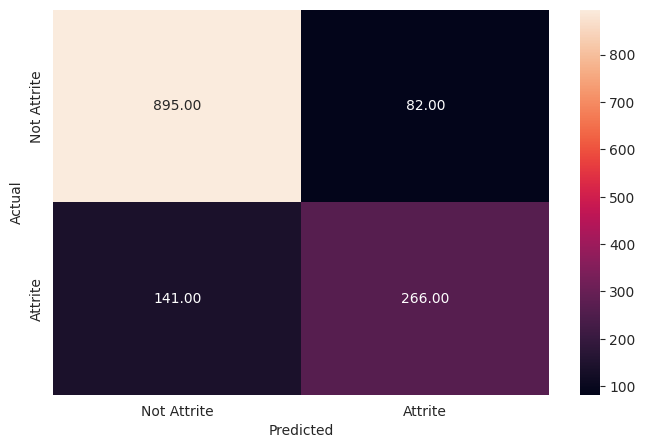

In [ ]:
# (b)
#For the test set:
y_pred = rfc.predict(X_test)
metrics_score(y_test, y_pred)

#Q2:The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

I will try to solve this question using basic EDA formulas and also, I will later use the Hypothesis Testing.

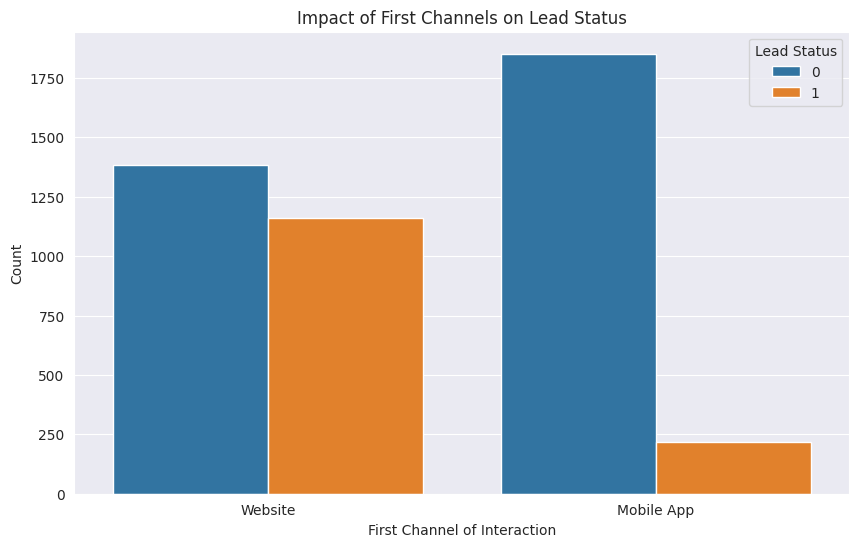

In [ ]:
# Perform data exploration and visualization
plt.figure(figsize=(10, 6))
sns.countplot(x="first_interaction", hue="status", data=data)
plt.title("Impact of First Channels on Lead Status")
plt.xlabel("First Channel of Interaction")
plt.ylabel("Count")
plt.legend(title="Lead Status")
plt.show()

Furthermore, to assess whether the first channels of interaction have an impact on lead status, I choose to use the hypothesis testing, using the Chi-squared test:

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(data['first_interaction'], data['status'])

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The first channels of interaction have an impact on the lead status.")
else:
    print("Fail to reject the null hypothesis: The first channels of interaction do not have an impact on the lead status.")


Chi-squared statistic: 668.0813826411269
p-value: 2.611251831709229e-147
Reject the null hypothesis: The first channels of interaction have an impact on the lead status.


The chi-squared test compares the observed frequencies in the contingency table with the expected frequencies under the assumption that the first channels of interaction do not have an impact on the lead status.

* If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that the first channels of interaction have an impact on the lead status. Otherwise, we fail to reject the null hypothesis and conclude that the first channels of interaction do not have an impact on the lead status.

Here and as seen from the above lines, we reach to the decision that the first channels of interaction do have an impact on the lead status.

#Q3: The company uses multiple modes to interact with prospects. Which way of interaction works best?

Based on the Data Dictionary, the company uses the following modes to interact with prospects:
1. print_media_type1: ad in Newspaper.
2. print_media_type2: ad in  Magazine.
3. digital_media: ad on digital platforms.
4. educational_channels: the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
5. referral: the lead had heard about ExtraaLearn through reference.

###print_media_type1:

(3228, 14) (1384, 14)
We can see that after encoding there are 14 columns.

Decision Tree Accuracy: 0.7752890173410405
Random Forest Accuracy: 0.8966763005780347
decision tree classifier metrics: 
              precision    recall  f1-score   support

          No       0.90      0.85      0.87      1242
         Yes       0.10      0.14      0.11       142

    accuracy                           0.78      1384
   macro avg       0.50      0.49      0.49      1384
weighted avg       0.81      0.78      0.79      1384



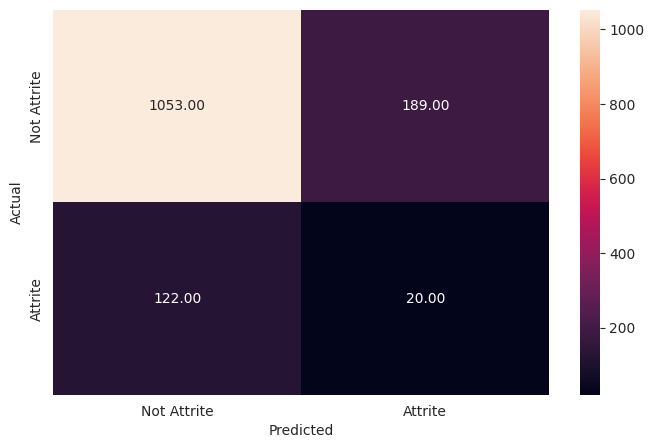

random forest classifier metrics: 
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      1242
         Yes       0.00      0.00      0.00       142

    accuracy                           0.90      1384
   macro avg       0.45      0.50      0.47      1384
weighted avg       0.81      0.90      0.85      1384



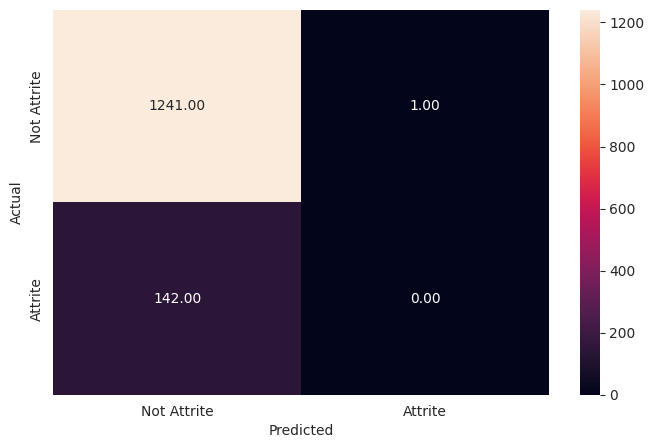

Decision Tree classifier metrics: 
precision_print_media_type1: 0.8140404053480711
recall_print_media_type1: 0.7752890173410405
f1_score_value_print_media_type1: 0.7936212624906153


In [ ]:
# Define the features and target variable
X = data.drop('print_media_type1', axis=1)
y = data['print_media_type1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
#print(X_train.isna().sum())
#print("-" * 30)
#print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
#for i in cols.columns:
#    print(X_train[i].value_counts())
#    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
#for i in cols.columns:
    #print(X_train[i].value_counts())
    #print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)
print("We can see that after encoding there are 14 columns.\n")

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy_pm1 = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy_pm1)
print("Random Forest Accuracy:", rf_accuracy)

## random forest classifier metrics:
print("decision tree classifier metrics: ")
metrics_score(y_test, dt_predictions)

## random forest classifier metrics:
print("random forest classifier metrics: ")
metrics_score(y_test, rf_predictions)



## Decision Tree classifier metrics:
print("Decision Tree classifier metrics: ")
classification_report_dict = classification_report(y_test, dt_predictions, output_dict=True)

# Print the F1-score
precision_print_media_type1 = classification_report_dict['weighted avg']['precision']
recall_print_media_type1 = classification_report_dict['weighted avg']['recall']
f1_score_value_print_media_type1 = classification_report_dict['weighted avg']['f1-score']
print("precision_print_media_type1:", precision_print_media_type1)
print("recall_print_media_type1:", recall_print_media_type1)
print("f1_score_value_print_media_type1:", f1_score_value_print_media_type1)

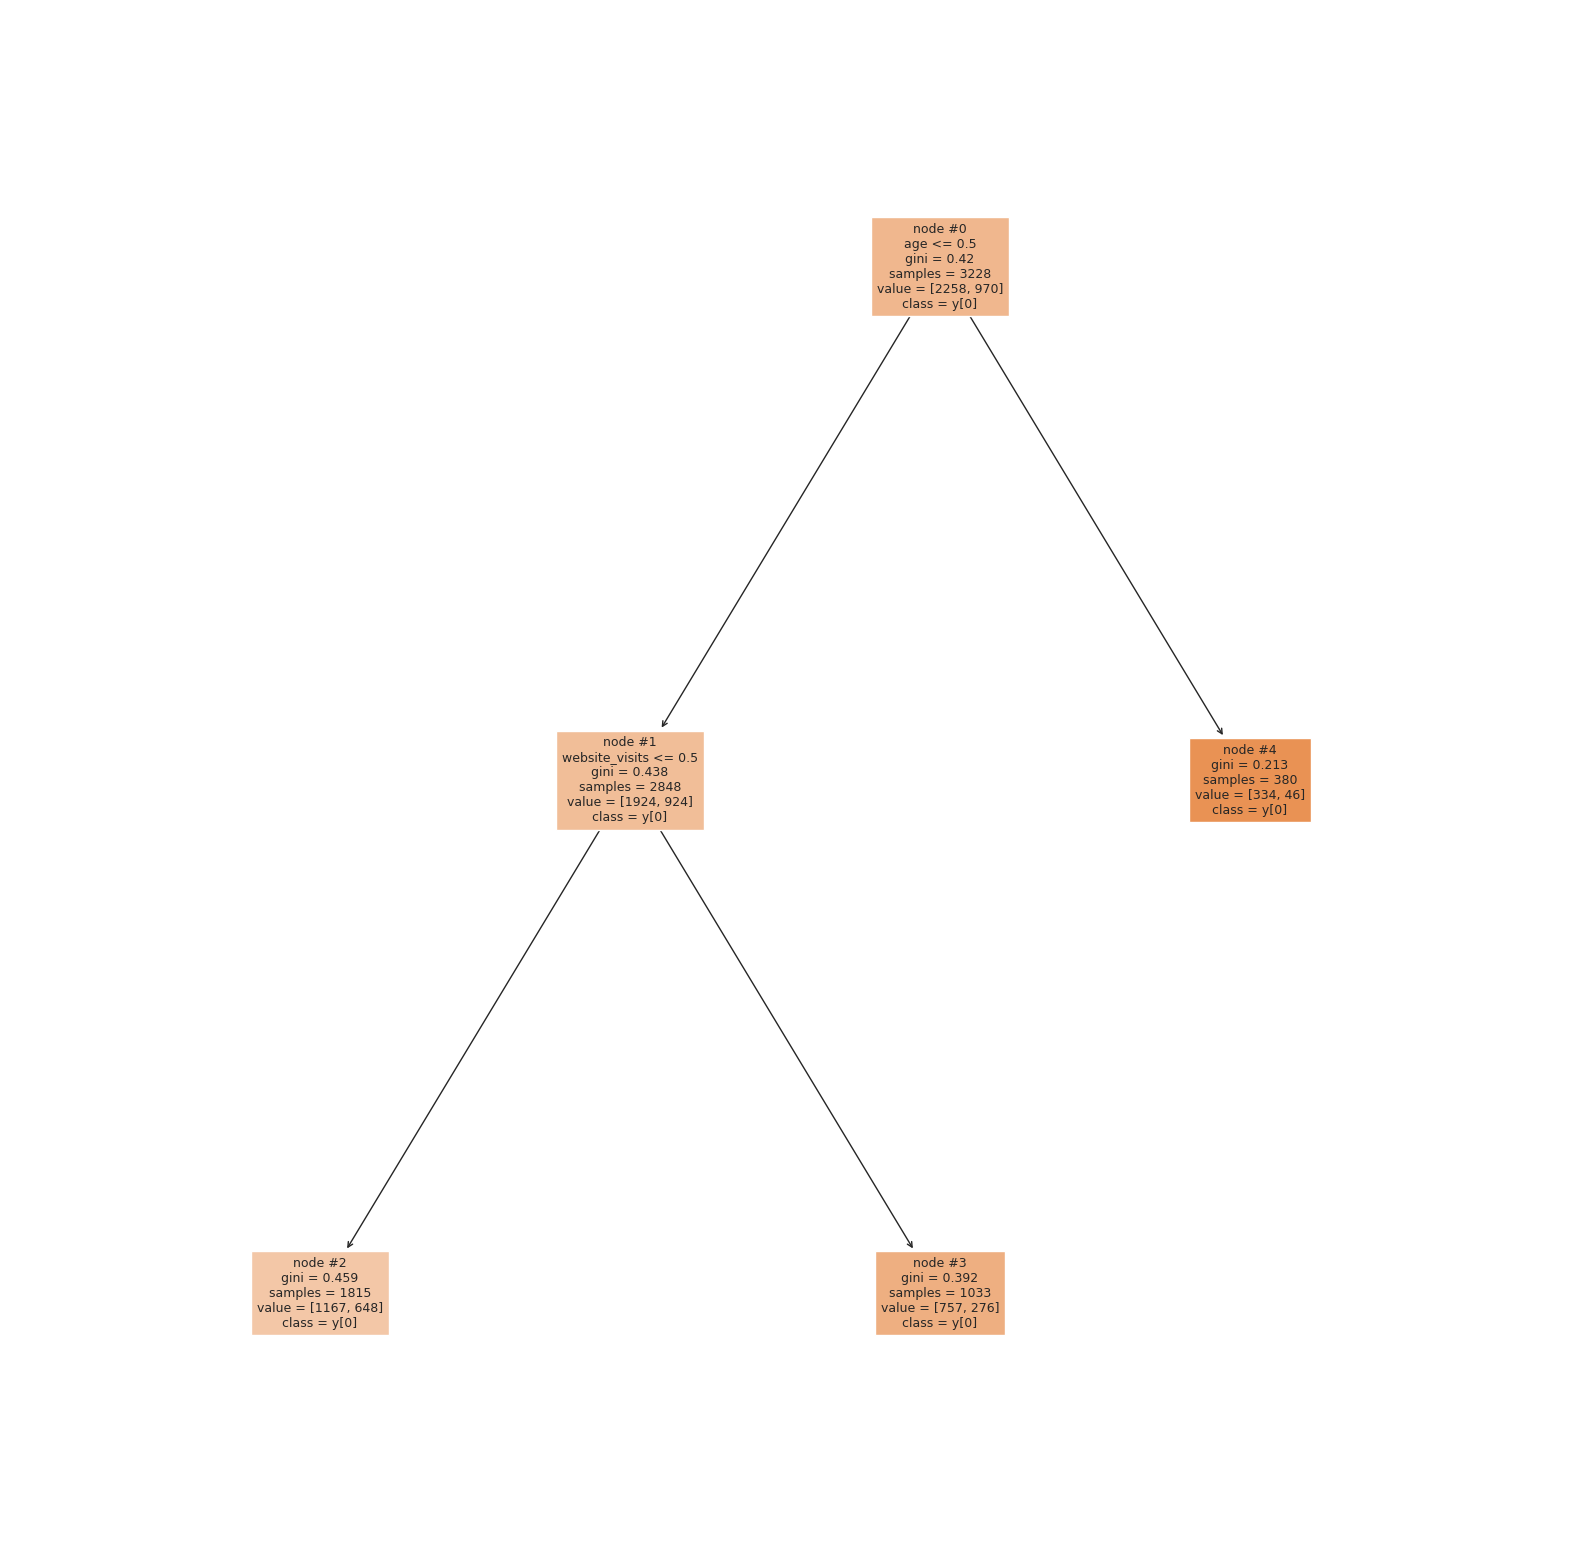

In [ ]:
#Let's visualize the decision tree:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### print_media_type2 :

Decision Tree Accuracy: 0.8966763005780347
Random Forest Accuracy: 0.9479768786127167
decision tree classifier metrics: 
              precision    recall  f1-score   support

          No       0.95      0.94      0.95      1313
         Yes       0.06      0.07      0.07        71

    accuracy                           0.90      1384
   macro avg       0.51      0.51      0.51      1384
weighted avg       0.90      0.90      0.90      1384



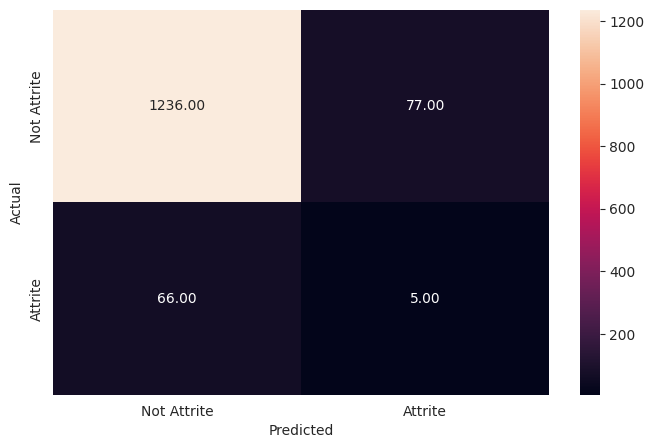

random forest classifier metrics: 
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1313
         Yes       0.00      0.00      0.00        71

    accuracy                           0.95      1384
   macro avg       0.47      0.50      0.49      1384
weighted avg       0.90      0.95      0.92      1384



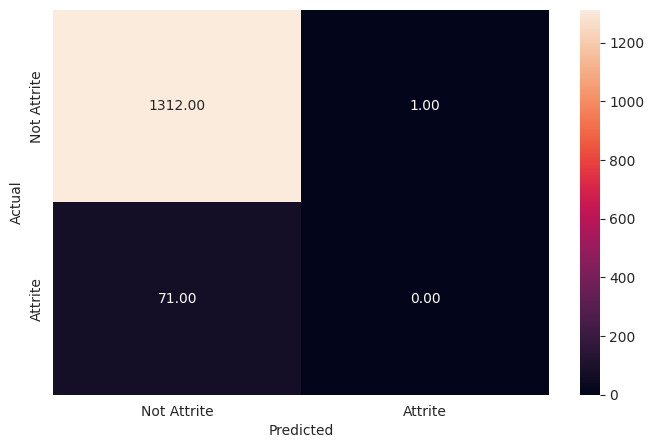

Decision Tree classifier metrics: 
precision_print_media_type2: 0.9037367518829819
recall_print_media_type2: 0.8966763005780347
f1_score_value_print_media_type2: 0.9001732355906512


In [ ]:
# Define the features and target variable
X = data.drop('print_media_type2', axis=1)
y = data['print_media_type2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
#print(X_train.isna().sum())
#print("-" * 30)
#print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
#for i in cols.columns:
#    print(X_train[i].value_counts())
#    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
#for i in cols.columns:
    #print(X_train[i].value_counts())
    #print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
#print(X_train.shape, X_test.shape)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy_pm2 = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy_pm2)
print("Random Forest Accuracy:", rf_accuracy)

## random forest classifier metrics:
print("decision tree classifier metrics: ")
metrics_score(y_test, dt_predictions)

## random forest classifier metrics:
print("random forest classifier metrics: ")
metrics_score(y_test, rf_predictions)


## Decision Tree classifier metrics:
print("Decision Tree classifier metrics: ")
classification_report_dict = classification_report(y_test, dt_predictions, output_dict=True)

# Print the F1-score
precision_print_media_type2 = classification_report_dict['weighted avg']['precision']
recall_print_media_type2 = classification_report_dict['weighted avg']['recall']
f1_score_value_print_media_type2 = classification_report_dict['weighted avg']['f1-score']
print("precision_print_media_type2:", precision_print_media_type2)
print("recall_print_media_type2:", recall_print_media_type2)
print("f1_score_value_print_media_type2:", f1_score_value_print_media_type2)

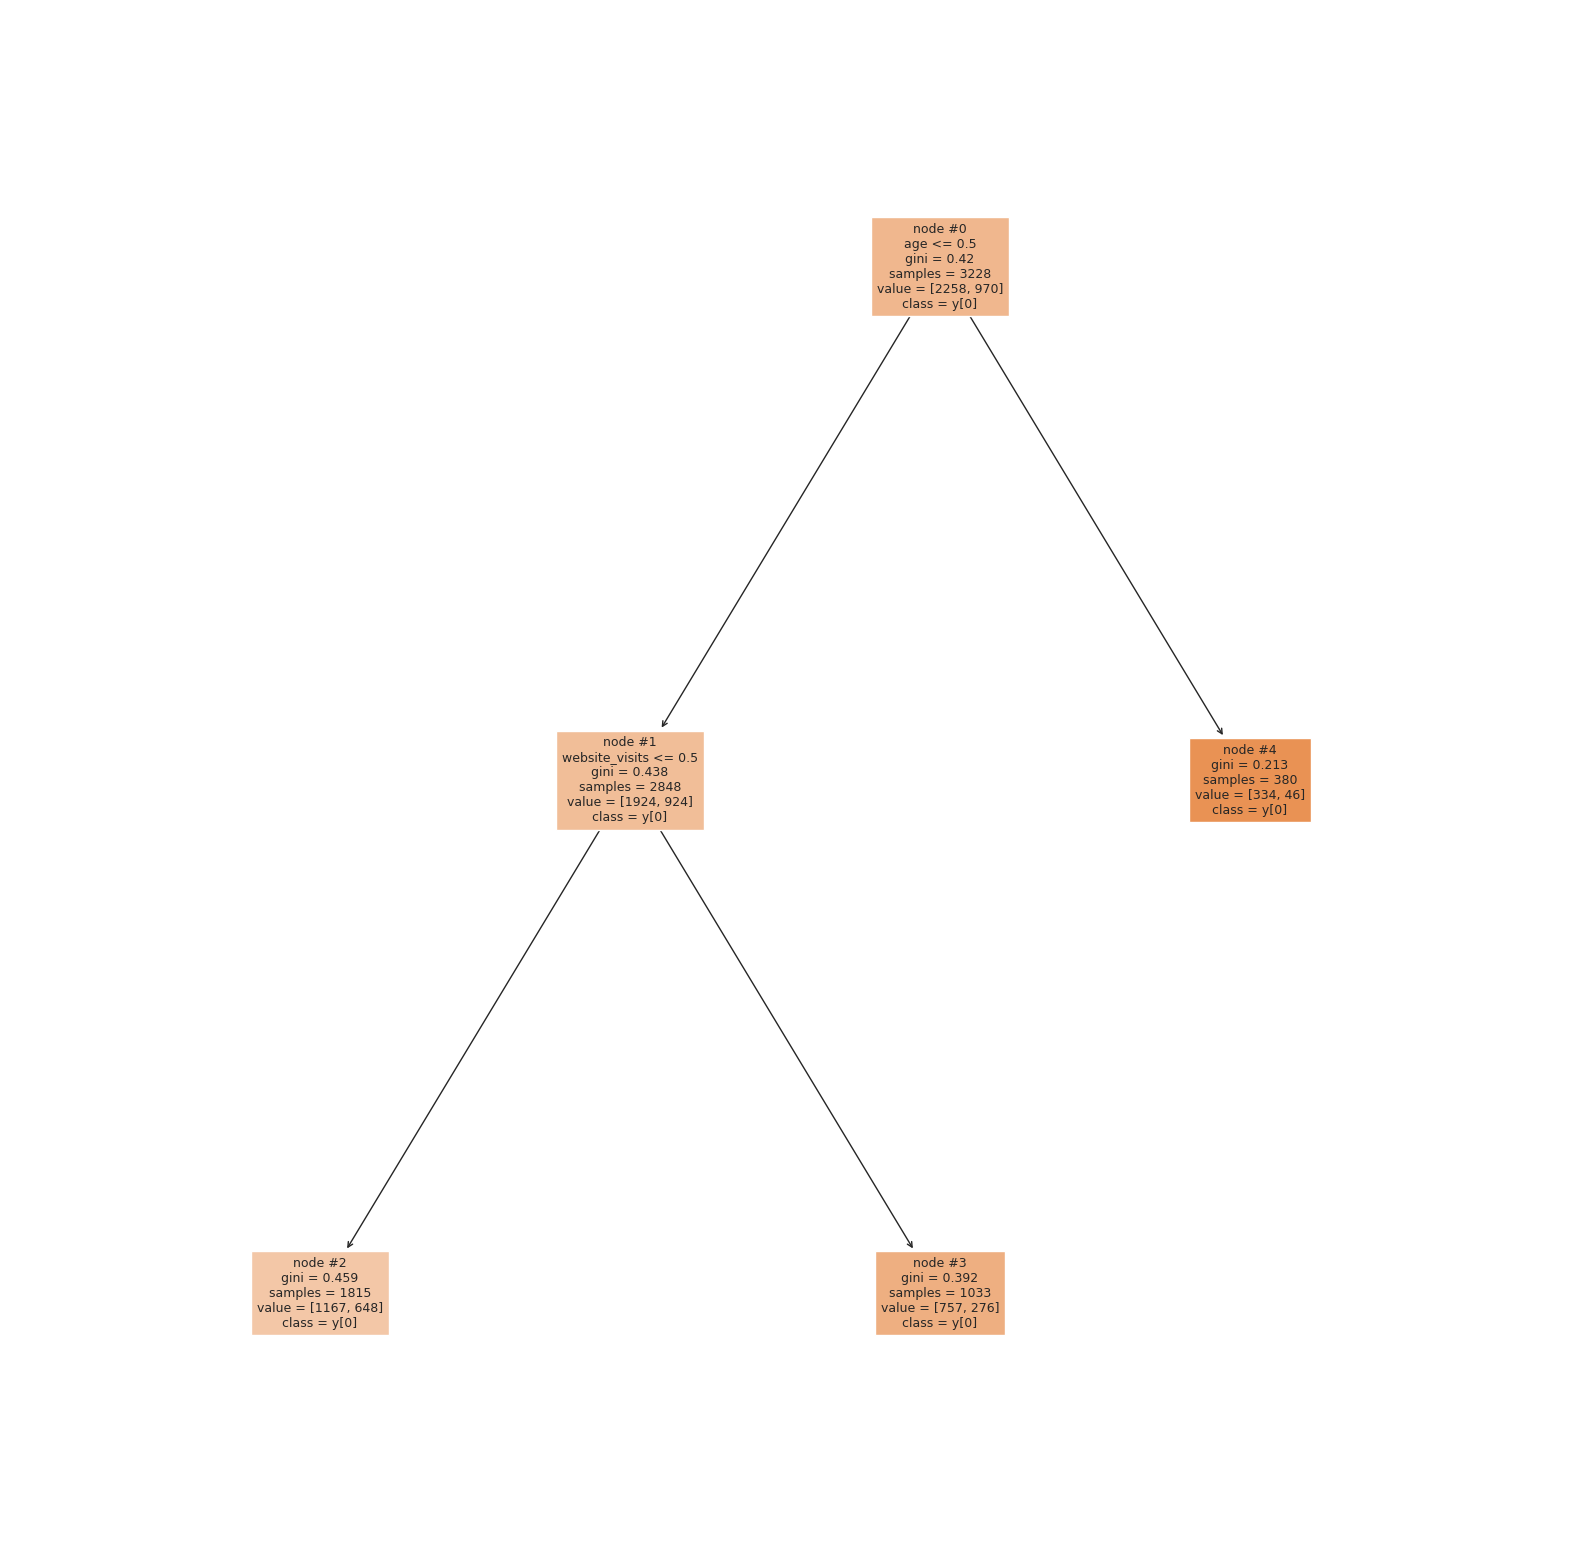

In [ ]:
#Let's visualize the decision tree:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

###digital_media:

Decision Tree Accuracy: 0.7984104046242775
Random Forest Accuracy: 0.8822254335260116
decision tree classifier metrics: 
              precision    recall  f1-score   support

          No       0.89      0.89      0.89      1221
         Yes       0.15      0.15      0.15       163

    accuracy                           0.80      1384
   macro avg       0.52      0.52      0.52      1384
weighted avg       0.80      0.80      0.80      1384



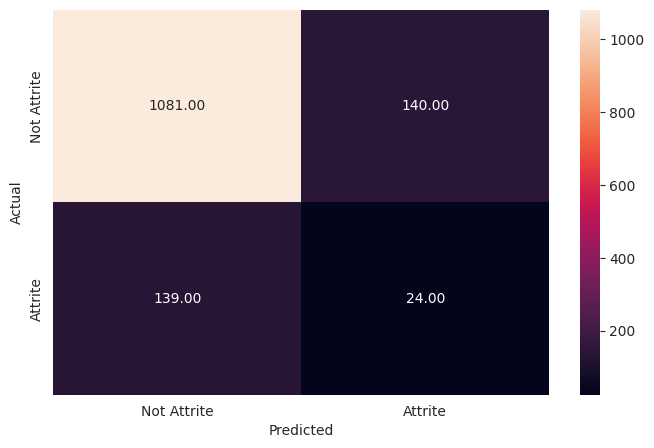

random forest classifier metrics: 
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      1221
         Yes       0.00      0.00      0.00       163

    accuracy                           0.88      1384
   macro avg       0.44      0.50      0.47      1384
weighted avg       0.78      0.88      0.83      1384



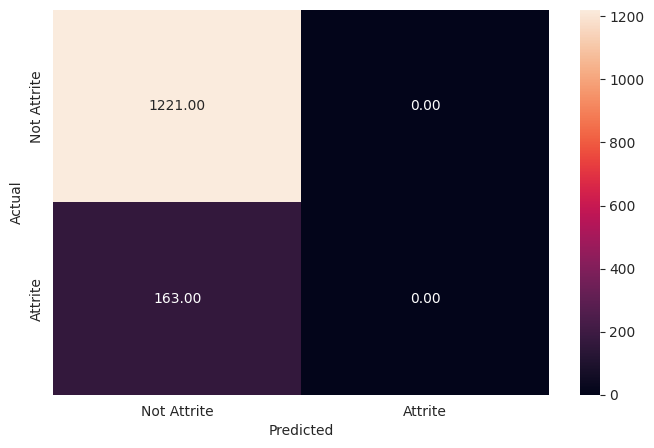

Decision Tree classifier metrics: 
precision_digital_media: 0.7989448873629739
recall_digital_media: 0.7984104046242775
f1_score_value_digital_media: 0.7986773531756084


In [ ]:
# Define the features and target variable
X = data.drop('digital_media', axis=1)
y = data['digital_media']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
#print(X_train.isna().sum())
#print("-" * 30)
#print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
#for i in cols.columns:
#    print(X_train[i].value_counts())
#    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
#for i in cols.columns:
    #print(X_train[i].value_counts())
    #print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
#print(X_train.shape, X_test.shape)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy_digital_media = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy_digital_media)
print("Random Forest Accuracy:", rf_accuracy)

## random forest classifier metrics:
print("decision tree classifier metrics: ")
metrics_score(y_test, dt_predictions)

## random forest classifier metrics:
print("random forest classifier metrics: ")
metrics_score(y_test, rf_predictions)



## Decision Tree classifier metrics:
print("Decision Tree classifier metrics: ")
classification_report_dict = classification_report(y_test, dt_predictions, output_dict=True)

# Print the F1-score
precision_digital_media = classification_report_dict['weighted avg']['precision']
recall_digital_media = classification_report_dict['weighted avg']['recall']
f1_score_value_digital_media = classification_report_dict['weighted avg']['f1-score']
print("precision_digital_media:", precision_digital_media)
print("recall_digital_media:", recall_digital_media)
print("f1_score_value_digital_media:", f1_score_value_digital_media)

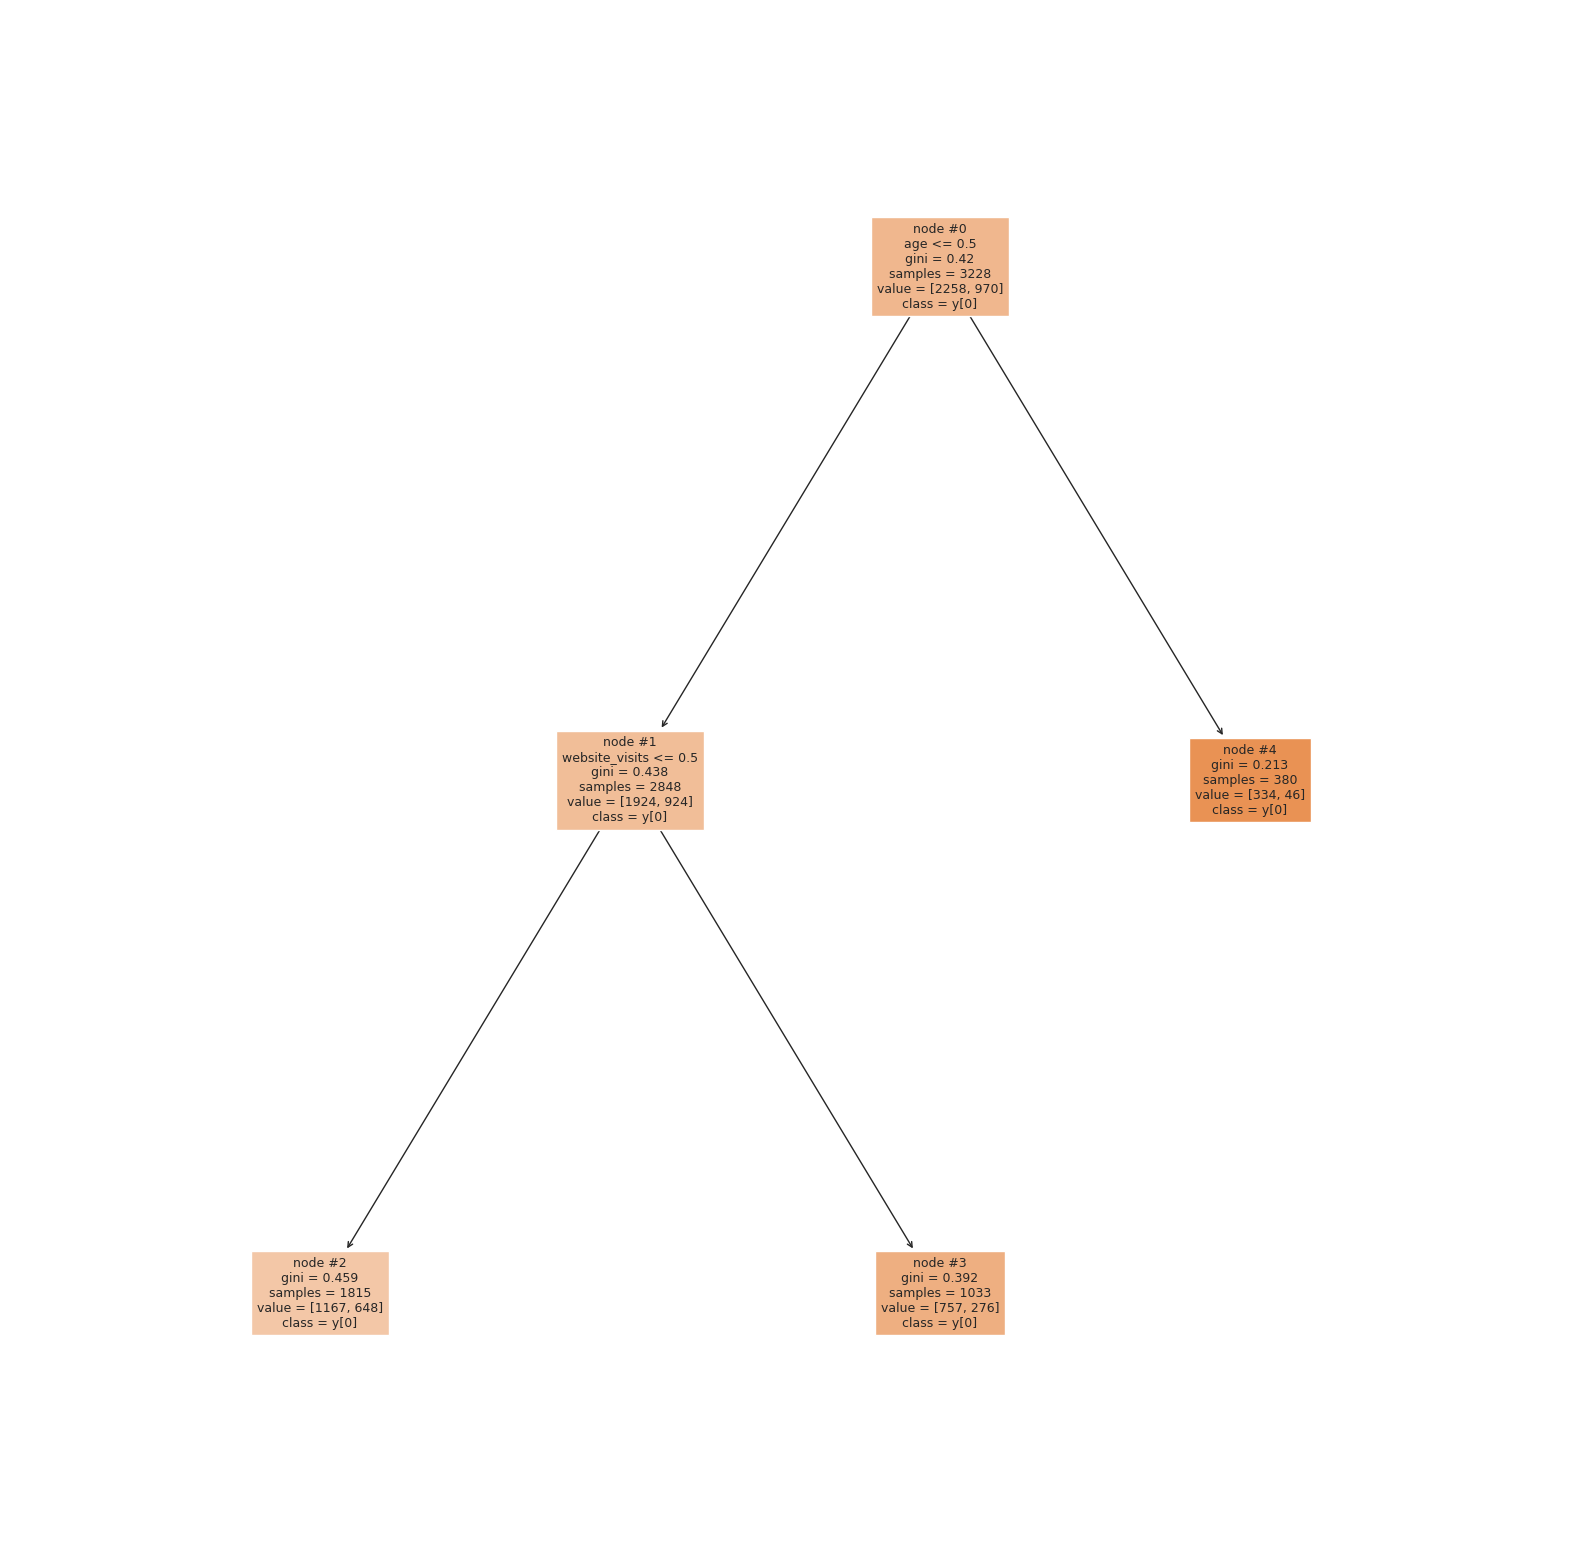

In [ ]:
#Let's visualize the decision tree:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### educational_channels:

Decision Tree Accuracy: 0.7117052023121387
Random Forest Accuracy: 0.8591040462427746
decision tree classifier metrics: 
              precision    recall  f1-score   support

          No       0.85      0.80      0.83      1192
         Yes       0.11      0.15      0.12       192

    accuracy                           0.71      1384
   macro avg       0.48      0.47      0.48      1384
weighted avg       0.75      0.71      0.73      1384



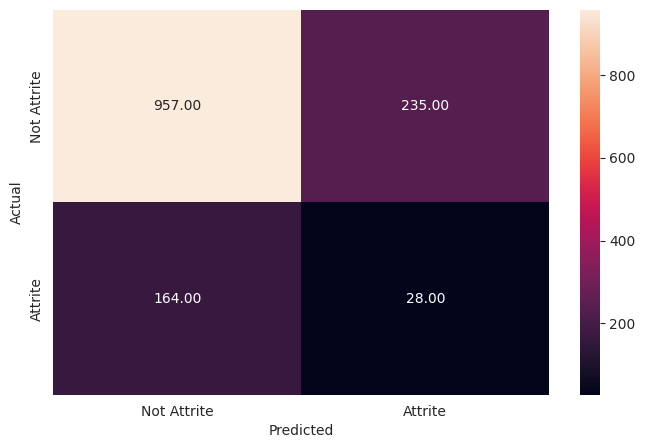

random forest classifier metrics: 
              precision    recall  f1-score   support

          No       0.86      1.00      0.92      1192
         Yes       0.00      0.00      0.00       192

    accuracy                           0.86      1384
   macro avg       0.43      0.50      0.46      1384
weighted avg       0.74      0.86      0.80      1384



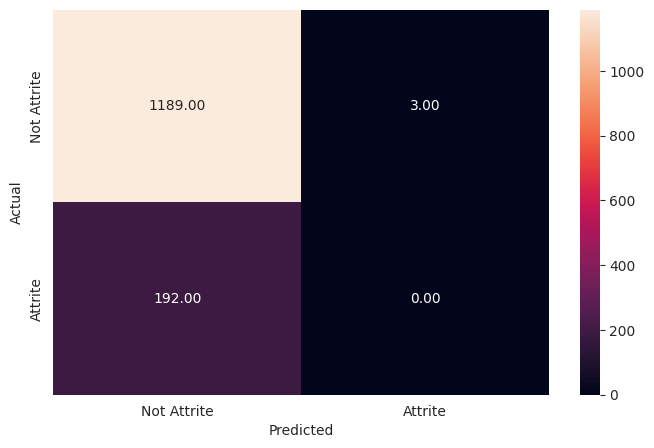

Decision Tree classifier metrics: 
precision_ec: 0.7500389525377812
recall_ec: 0.7117052023121387
f1_score_value_ec: 0.7297737746535571


In [ ]:
# Define the features and target variable
X = data.drop('educational_channels', axis=1)
y = data['educational_channels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
#print(X_train.isna().sum())
#print("-" * 30)
#print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
#for i in cols.columns:
#    print(X_train[i].value_counts())
#    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
#for i in cols.columns:
    #print(X_train[i].value_counts())
    #print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
#print(X_train.shape, X_test.shape)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy_ec = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy_ec)
print("Random Forest Accuracy:", rf_accuracy)

## random forest classifier metrics:
print("decision tree classifier metrics: ")
metrics_score(y_test, dt_predictions)

## random forest classifier metrics:
print("random forest classifier metrics: ")
metrics_score(y_test, rf_predictions)


## Decision Tree classifier metrics:
print("Decision Tree classifier metrics: ")
classification_report_dict = classification_report(y_test, dt_predictions, output_dict=True)

# Print the F1-score
precision_ec = classification_report_dict['weighted avg']['precision']
recall_ec = classification_report_dict['weighted avg']['recall']
f1_score_value_ec = classification_report_dict['weighted avg']['f1-score']
print("precision_ec:", precision_ec)
print("recall_ec:", recall_ec)
print("f1_score_value_ec:", f1_score_value_ec)

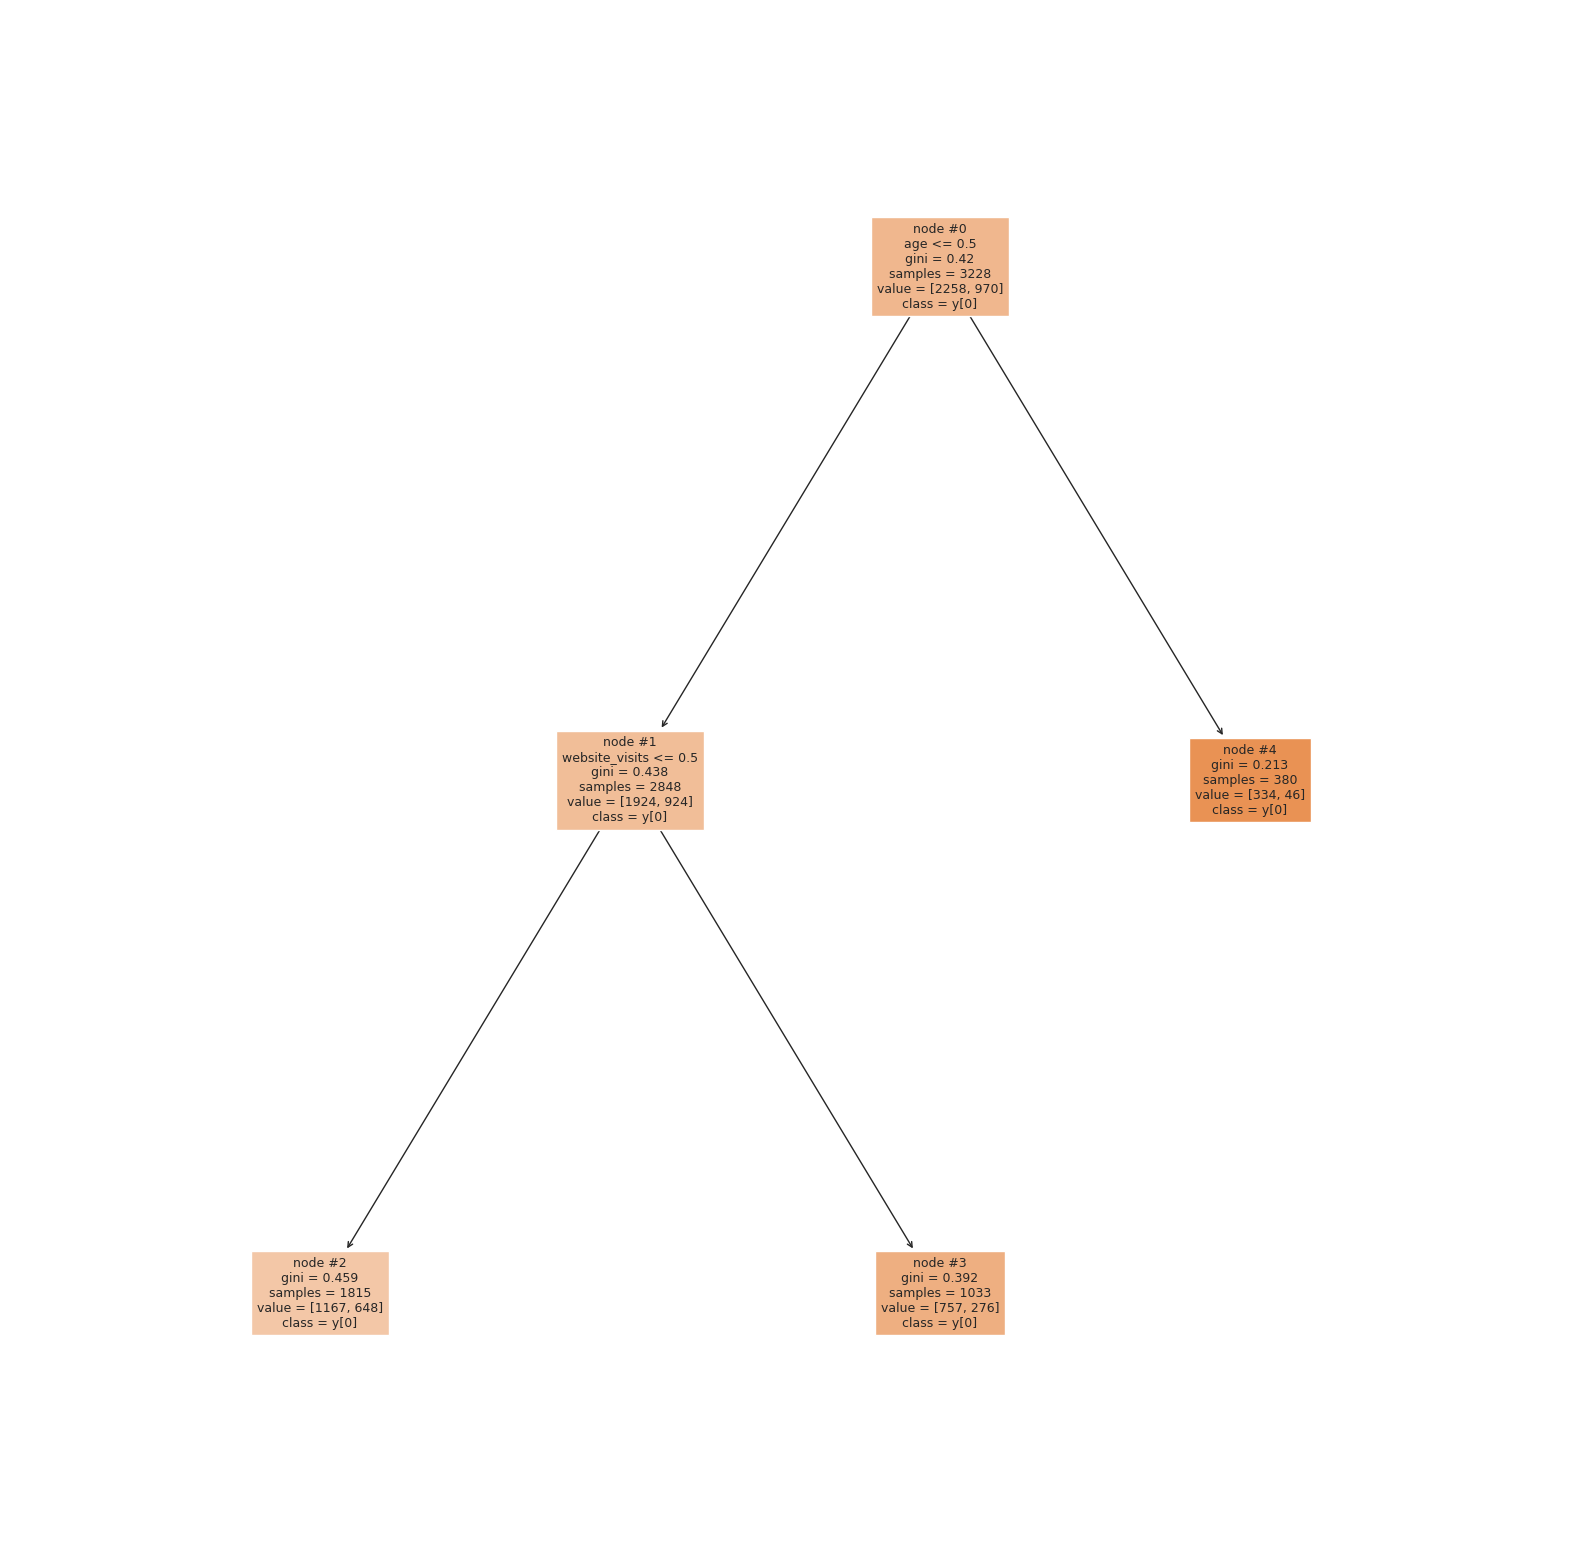

In [ ]:
#Let's visualise the tree:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### referral:

Decision Tree Accuracy: 0.9638728323699421
Random Forest Accuracy: 0.9804913294797688
decision tree classifier metrics: 
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      1357
         Yes       0.07      0.07      0.07        27

    accuracy                           0.96      1384
   macro avg       0.53      0.53      0.53      1384
weighted avg       0.96      0.96      0.96      1384



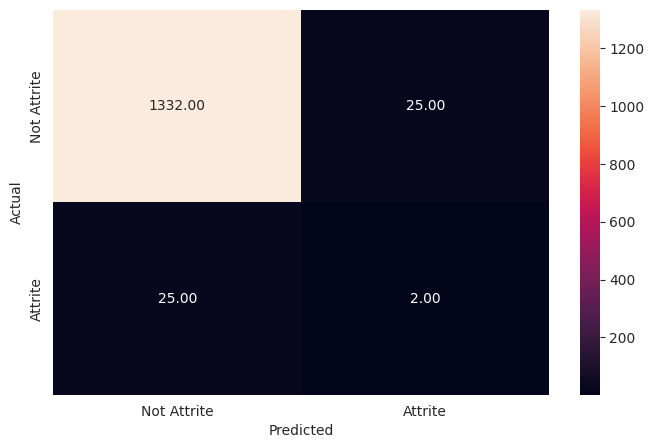

Decision Tree classifier metrics: 
precision_Ref: 0.9638728323699421
recall_Ref: 0.9638728323699421
F1-score: 0.9638728323699421


In [ ]:
# Define the features and target variable
X = data.drop('referral', axis=1)
y = data['referral']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking that no column has missing values in train or test sets
#print(X_train.isna().sum())
#print("-" * 30)
#print(X_test.isna().sum())

cols = X_train.select_dtypes(include=["object", "category"])
#for i in cols.columns:
#    print(X_train[i].value_counts())
#    print("*" * 30)


cols = X_test.select_dtypes(include=["object", "category"])
#for i in cols.columns:
    #print(X_train[i].value_counts())
    #print("*" * 30)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
#print(X_train.shape, X_test.shape)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy_ref = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy_ref)
print("Random Forest Accuracy:", rf_accuracy)

## random forest classifier metrics:
print("decision tree classifier metrics: ")
metrics_score(y_test, dt_predictions)

## Decision Tree classifier metrics:
print("Decision Tree classifier metrics: ")
classification_report_dict = classification_report(y_test, dt_predictions, output_dict=True)

# Print the F1-score
precision_ref = classification_report_dict['weighted avg']['precision']
recall_ref = classification_report_dict['weighted avg']['recall']
f1_score_value_ref = classification_report_dict['weighted avg']['f1-score']
print("precision_Ref:", precision_ref)
print("recall_Ref:", recall_ref)
print("F1-score:", f1_score_value_ref)

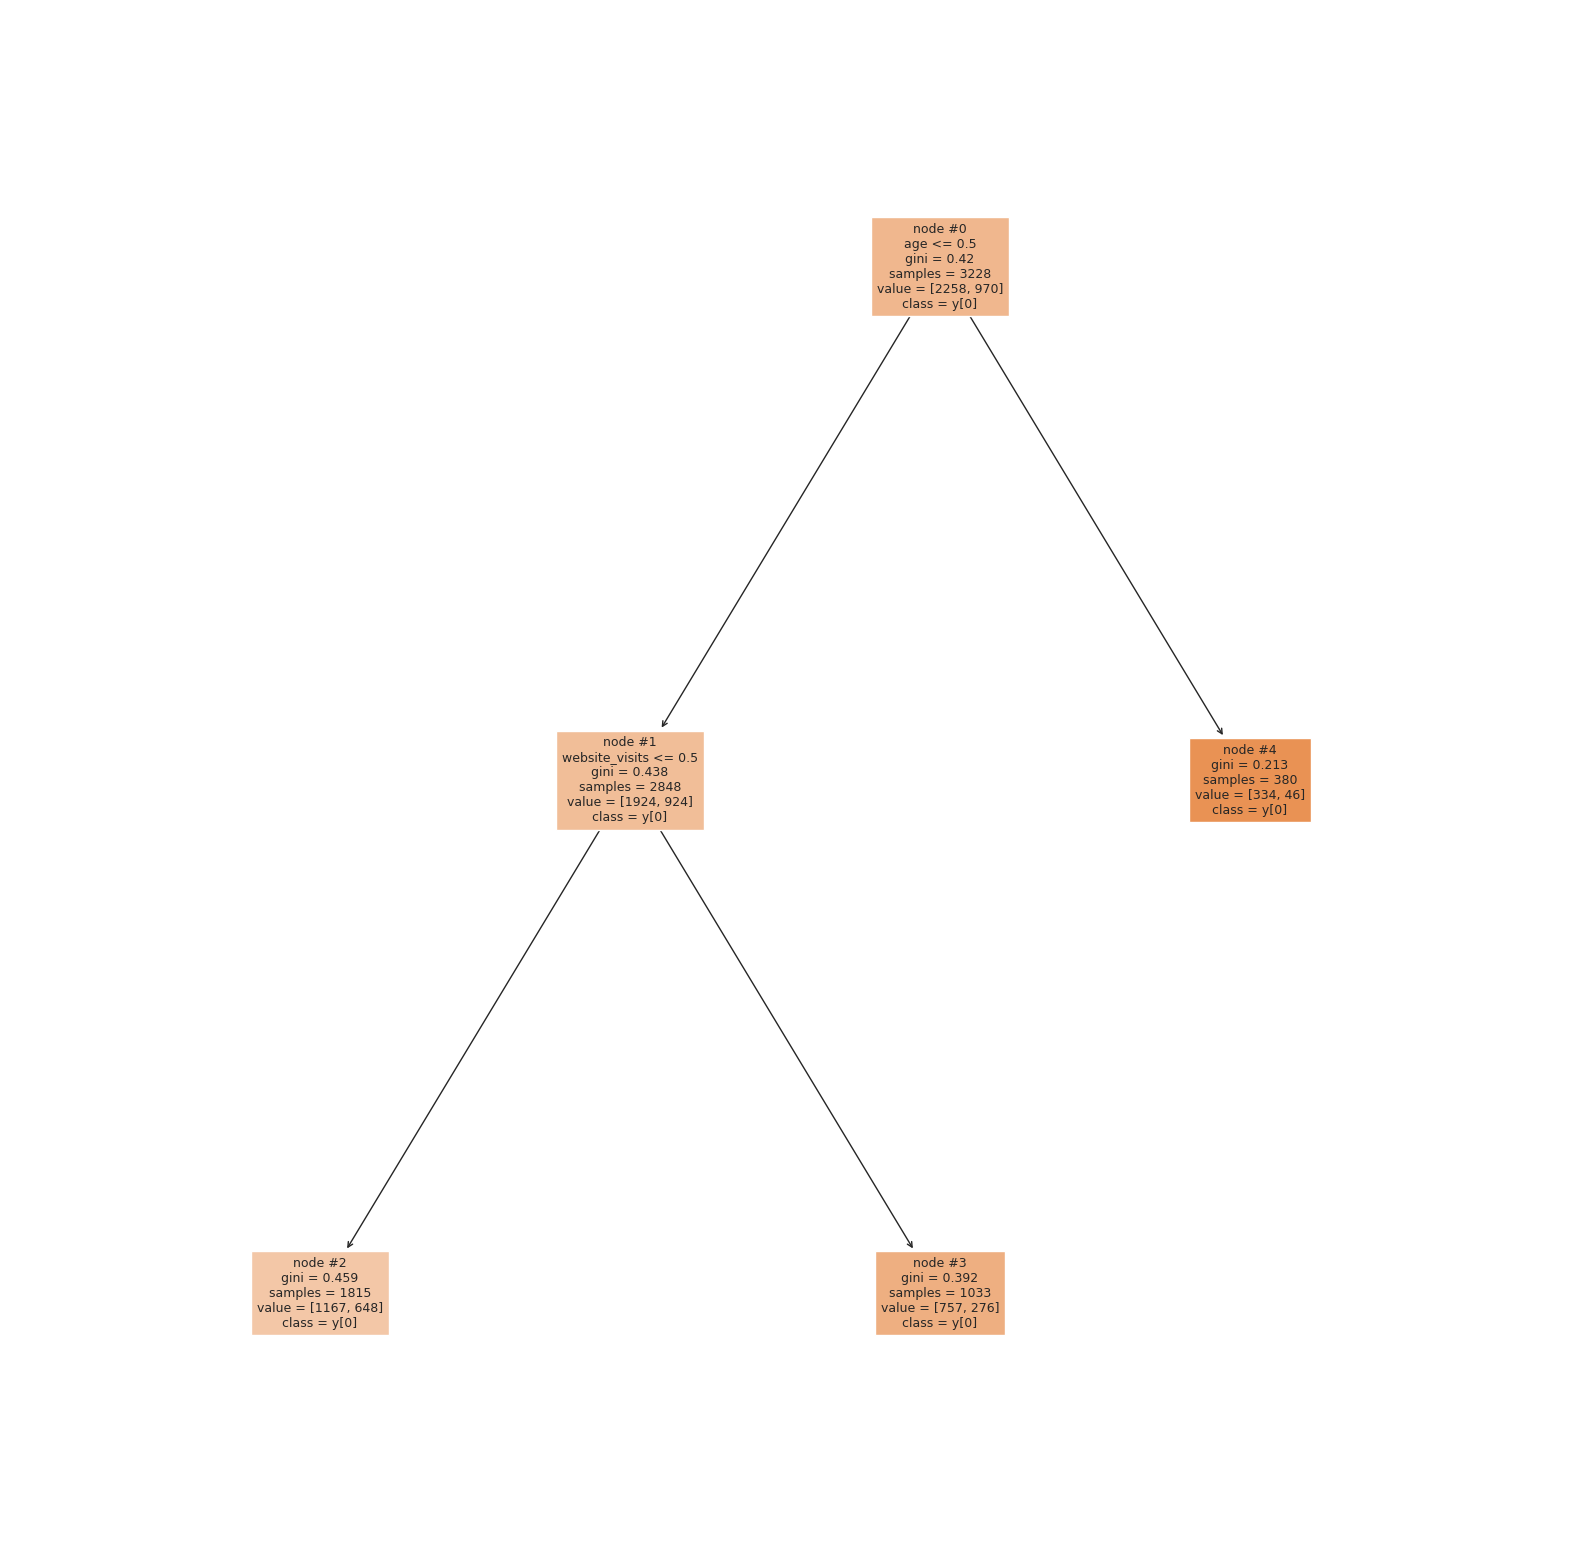

In [ ]:
#Let's visualise the tree:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### **In conclusion:**
After considering the metrics of all models:

                 Model  Accuracy  Precision    Recall  F1-Score
0            Newspaper  0.775289   0.814040  0.775289  0.793621
1             Magazine  0.896676   0.903737  0.896676  0.900173
2        Digital Media  0.798410   0.798945  0.798410  0.798677
3  Educational Channel  0.711705   0.750039  0.711705  0.729774
4             Referral  0.963873   0.963873  0.963873  0.963873


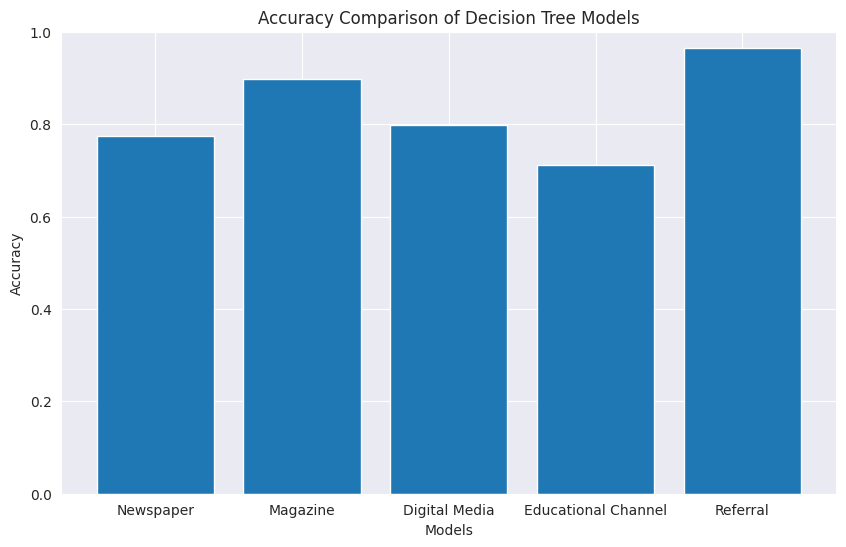

In [ ]:
# Example data (replace with your actual metrics)
data = {
    'Model': ['Newspaper', 'Magazine', 'Digital Media', 'Educational Channel', 'Referral'],
    'Accuracy': [dt_accuracy_pm1, dt_accuracy_pm2, dt_accuracy_digital_media, dt_accuracy_ec, dt_accuracy_ref],
    'Precision': [precision_print_media_type1, precision_print_media_type2, precision_digital_media, precision_ec, precision_ref],
    'Recall': [recall_print_media_type1, recall_print_media_type2, recall_digital_media, recall_ec, recall_ref],
    'F1-Score': [f1_score_value_print_media_type1, f1_score_value_print_media_type2, f1_score_value_digital_media, f1_score_value_ec, f1_score_value_ref],
}


# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the performance table
print(df)

# Create a bar chart to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'])
plt.title('Accuracy Comparison of Decision Tree Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy values (0-1)
plt.show()

### **The method that works best for the company is the Refferal method, and the second best method is the Magazine (print_media_2).**

#Q4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [ ]:
# Calculate the lead conversion rate for each channel
data = pd.read_csv('ExtraaLearn.csv')
conversion_rates = data.groupby('first_interaction')['status'].mean()

# Find the channel with the highest lead conversion rate
highest_conversion_rate_channel = conversion_rates.idxmax()

print(f"The channel with the highest lead conversion rate is: {highest_conversion_rate_channel}")


The channel with the highest lead conversion rate is: Website


#Q5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?


In [ ]:
# Calculate the lead conversion rate for each level of detail
conversion_rates = data.groupby('profile_completed')['status'].mean()

# Find the level of detail with the highest lead conversion rate
highest_conversion_rate_detail_level = conversion_rates.idxmax()

print(f"The level of detail with the highest lead conversion rate is: {highest_conversion_rate_detail_level}")


The level of detail with the highest lead conversion rate is: High


#In conclusion:
The proposed project involves working with a startup company named ExtraaLearn in the EdTech industry. The company is facing challenges in identifying and prioritizing leads that are more likely to convert into paying customers. The objective is to leverage data analysis and machine learning to improve the lead conversion process. More specifically, ou goal here was to

(a) build a machine learning model to predict which leads are more likely to convert into paid customers, which involved classifying leads into two categories: likely to convert and not likely to convert;

(b) identify and analyze the factors or features that drive the lead conversion process, including understanding which aspects of the leads and their interactions with the company's resources influence the likelihood of conversion; and

(c) create profiles of the leads that are likely to convert. These profiles should provide insights into the characteristics and behaviors of leads that have a higher conversion probability.

## Actionable Insights and Recommendations

* In this project, I managed to  build a predictive model that:

a) helps the company find out how current occupation affects lead status.

b) helps the company realize the importance of first channels of interaction.

c) assists the company to use the interactions that work best for their potential customers.

d) helps the company focus on channels that have the highest lead conversion rate.

e) makes the company realize that the more details they get about a prospect the bigger are the chances of conversion from lead to customer.

**The most important parameters that the company should emphasize are:
time_spent_on_website, first_interaction, age and profile_completed.**


Here are ome recommendations that I would suggest to the company:

1. The model has identified potential customers who are more likely to convert into leads. The company should focus on targeting these customers with personalized marketing campaigns.
2. The model has also identified the factors that contribute to a higher conversion rate. The company should consider implementing these strategies to enhance its conversion rate.
3. The model has revealed that certain customer experience factors, such as website load speed and mobile-friendliness, significantly impact conversion rates. The company should prioritize improving these aspects to enhance the overall customer experience.
4. The model has demonstrated that personalized marketing campaigns are more effective in generating leads. The company should invest in developing personalized marketing campaigns tailored to the preferences and needs of potential customers.
5. The model has identified the most effective marketing channels for generating leads. The company should allocate more resources to these channels to maximize their potential.
7. The company should regularly monitor the performance of its marketing campaigns and make adjustments to the strategies based on the insights provided by the model. This will ensure that the company stays ahead of the competition and continuously optimizes its marketing efforts.

Last but not least, the insights provided by the model can significantly improve the company's marketing strategies and enhance its overall performance. By implementing the recommendations outlined above, the company can effectively target potential customers, improve its conversion rate, enhance customer experience, and continuously optimize its marketing efforts.